## The third In-class-exercise (2/22/2022, 40 points in total)

The purpose of this exercise is to understand text representation.

Question 1 (10 points): Describe an interesting text classification or text mining task and explain what kind of features might be useful for you to build the machine learning model. List your features and explain why these features might be helpful. You need to list at least five different types of features.

In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Text classification is a machine learning technique for classifying open-ended text into a collection of predetermined categories.
Text classifiers can organize, arrange, and categorize almost any type of text, including documents, medical research, and files, as well as text found on the internet.

On the IMDB movie reviews data, I had like to do text mining operations and feature extraction. In order to achieve dimensionality reduction,
I'd like to use several feature extraction methods and measure specific distinguishing properties of our data. It is examined in order to determine which of these techniques is most effective
in achieving high learning algorithm performance. Because this enhances the classifier's prediction accuracy.

I'd want to apply the Part-of-Speech (POS) extraction technique, which assigns a particular label to each token in a text corpus to denote the part of speech as well as other grammatical characteristics like tense, number, and case.

1. Number of Adjective in each sentence
2. Number of Adverbs in adverbs in each sentence.
3. Number of Coordinating conjuctions in each sentence
4. Number of Interjections in each sentence
5. Number of Nouns in each sentence
6. Number of verbs in each sentence
7. Number of personal pronouns in each sentence.

This features helpful in Buiding a Machine learning model in real time.
'''

# **Question 2 (20 points): Write python code to extract these features you discussed above. You can collect a few sample text data for the feature extraction.**

In [14]:
from google.colab import files
src = list(files.upload().values())[0]
open('contractions.py','wb').write(src)

Saving contractions.py to contractions.py


In [21]:
from contractions import CONTRACTION_MAP as cMap

In [ ]:
import spacy
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import time
import nltk
import numpy as np
import pandas as pd
import re
nltk.download('stopwords')

sp = spacy.load('en_core_web_sm')
tokenizer = ToktokTokenizer()
stopwords_list = stopwords.words('english')
nltk.download('averaged_perceptron_tagger')

class Analysis:

    def __init__(self, website_url):
        self.url = website_url
        options = Options()
        options.add_argument('--headless')
        options.add_argument('--blink-settings=imagesEnabled=false')
        self.driver = webdriver.Chrome('chromedriver', options=options)

    def extractReviews(self):
        array_title = []
        array_review = []
        self.driver.get(self.url)
        for n in range(10):
            load_more_Button = self.driver.find_element_by_class_name("ipl-load-more__button")
            if load_more_Button is not None:
                load_more_Button.click()
                time.sleep(5)
                listOfTitle = self.driver.find_elements(By.CLASS_NAME, "title")
                listOfReviews = self.driver.find_elements(By.CLASS_NAME, "text")
                for ele, sub_ele in zip(listOfTitle, listOfReviews):
                    array_title.append((ele.text).replace('\n', ''))
                    array_review.append(sub_ele.text)
        df = pd.DataFrame({'Title': array_title, 
                           'Review': array_review})
        df.to_csv('/content/sample_data/5731.csv')

    def basicPreprocessing(self, filepath):
        df = pd.read_csv(filepath)
        df.replace(np.nan, '', inplace=True)
        combinedStringList = df['Review'].values.tolist()
        preprocessed_List = []
        for combinedString in combinedStringList:
            text = self.expandContractions(combinedString)
            text = self.removeSpecialCharcters(text)
            text = self.lemmatizeText(text)
            text = self.removeSpecialCharcters(text)
            preprocessed_List.append(text)
        df['preprocessed CombinedString'] = combinedStringList
        df.to_csv('/content/sample_data/preproceedReviews.csv')

    def expandContractions(self, combinedText):
        words = combinedText.split()
        expanded_words_list = [cMap[word] if word in cMap else word for word in words]
        expanded_text = ' '.join(expanded_words_list)
        return expanded_text

    def removeSpecialCharcters(self, combinedText):
        try:
            pattern = r'[^a-zA-Z0-9\s]'
            combinedText = re.sub(pattern, '', combinedText)
        except TypeError:
            pass
        return combinedText

    def lemmatizeText(self, combinedText):
        try:
            combinedText = sp(combinedText)
            combinedText = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in combinedText])
        except TypeError:
            pass
        return combinedText

    def get_tokens(self, combinedText):
        tokens = tokenizer.tokenize(combinedText)
        tokens = [token.strip() for token in tokens]
        return tokens

    def remove_stopwords(self, combinedText):
        tokens = self.get_tokens(combinedText)
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords_list]
        filtered_text = ' '.join(filtered_tokens)
        return filtered_text

    def getPartsOfSpeech(self, filepath):
        df = pd.read_csv(filepath)

        df.drop(columns=[df.columns[0],df.columns[1]] , inplace=True)
        df.replace(np.nan, '', inplace=True)
        preprocessedReviews= df['preprocessed CombinedString'].values.tolist()

        Adjective = []
        Adverb = []
        CordinatingConjunction = []
        SubordinatingConjuction = []
        Interjection = []
        Noun = []
        Verb = []
        PersonalPronoun = []
        predeterminer = []
        Determiner = []
        for review in preprocessedReviews:
            numberOfAdjective = 0
            numberOfAdverb = 0
            numberOfCordinatingConjunction = 0
            numberOfSubordinatingConjuction = 0
            numberOfInterjection = 0
            numberOfNoun = 0
            numberOfVerb = 0
            numberOfPersonalPronoun = 0
            numberOfpredeterminer = 0
            numberOfDeterminer = 0
            tokens = self.get_tokens(review)
            value = nltk.pos_tag(tokens)
            for word, tag in value:
                if tag == 'JJ':
                    numberOfAdjective = numberOfAdjective + 1
                elif tag == 'RB':
                    numberOfAdverb = numberOfAdverb + 1
                elif tag == 'CC':
                    numberOfCordinatingConjunction = numberOfCordinatingConjunction + 1
                elif tag == 'UH':
                    numberOfInterjection = numberOfInterjection + 1
                elif tag == 'NN':
                    numberOfNoun = numberOfNoun + 1
                elif tag == 'VR':
                    numberOfVerb = numberOfVerb + 1
                elif tag == 'PRP':
                    numberOfPersonalPronoun = numberOfPersonalPronoun + 1
                elif tag == 'PDT':
                    numberOfpredeterminer = numberOfpredeterminer + 1
                elif tag == 'DT':
                    numberOfDeterminer = numberOfDeterminer + 1
                elif tag == 'IN':
                    numberOfSubordinatingConjuction = numberOfSubordinatingConjuction + 1

            Adjective.append(numberOfAdjective)
            Adverb.append(numberOfAdverb)
            CordinatingConjunction.append(numberOfCordinatingConjunction)
            SubordinatingConjuction.append(numberOfSubordinatingConjuction)
            Interjection.append(numberOfInterjection)
            Noun.append(numberOfNoun)
            Verb.append(numberOfVerb)
            PersonalPronoun.append(numberOfPersonalPronoun)
            predeterminer.append(numberOfpredeterminer)
            Determiner.append(numberOfDeterminer)
        df['Number_of_Adjectives'] = Adjective
        df['Number_of_Adverbs'] = Adverb
        df['Number_of_Cordinating_Conjunctions'] = CordinatingConjunction
        df['Number_of_Interjections'] = Interjection
        df['Number_of_Nouns'] = Noun
        df['Number_of_Verbs'] = Verb
        df['Number_of_Personal_Pronouns'] = PersonalPronoun
        df['Number_of_Predeterminers'] = predeterminer
        df['Number_of_Determiners'] = Determiner
        df['Number_of_Subordinating_Conjuctions'] = SubordinatingConjuction
        df.to_csv('/content/sample_data/POS_5731.csv', index='Title')

In [ ]:
if __name__ == '__main__':
    obj = Analysis('')
    obj.basicPreprocessing('/Users/bhanugollapudi/Documents/5731.csv')
    obj.getPartsOfSpeech('/Users/bhanugollapudi/Documents/preproceedReviews.csv')

Question 3 (10 points): Use any of the feature selection methods mentioned in this paper "Deng, X., Li, Y., Weng, J., & Zhang, J. (2019). Feature selection for text classification: A review. Multimedia Tools & Applications, 78(3)." Select the most important features you extracted above, rank the features based on their importance in the descending order. 

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [95]:
df = pd.read_csv('/content/sample_data/POS_5731.csv')

In [96]:
df.dropna(inplace=True)

In [97]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [98]:
X = df.iloc[:, 3:-1]

In [99]:
X

,Number_of_Adjectives,Number_of_Adverbs,Number_of_Cordinating_Conjunctions,Number_of_Interjections,Number_of_Nouns,Number_of_Verbs,Number_of_Personal_Pronouns,Number_of_Predeterminers,Number_of_Determiners
3,10,6,5,0,14,0,11,0,12
4,35,36,30,0,51,0,28,2,48
7,46,34,39,0,79,0,29,0,70
8,4,2,1,0,5,0,3,0,6
10,54,46,10,0,84,0,35,0,53
...,...,...,...,...,...,...,...,...,...
1618,5,0,0,0,3,0,1,0,4
1620,18,1,4,0,30,0,7,0,14
1622,14,14,9,0,19,0,18,0,21
1623,46,24,18,0,61,0,21,1,53


In [100]:
y = df['preprocessed CombinedString']

In [101]:
y

3       I was not expecting that, I had visions of a f...
4       Of course I am just riffing off, teasing and m...
7       Having seen the trailer for the 2021 Marvel ac...
8       I find this film very engaging from start to f...
10      It's been ten years since Shang-Chi(Liu, charm...
                              ...                        
1618    The MCU is getting out of it's repetitive trai...
1620    It was hard to believe that Destin Daniel Cret...
1622    I was really hoping to like Shang-Chi but I co...
1623    If you rarely are disappointed with Marvel fil...
1624    The plot was averagely old hat and covered gro...
Name: preprocessed CombinedString, Length: 1320, dtype: object

In [102]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2, 
                                                    random_state=101)

In [103]:
X_train.shape, Y_train.shape, x_test.shape, y_test.shape

((1056, 9), (1056,), (264, 9), (264,))

In [ ]:
correlationMatrix = X_train.corr()

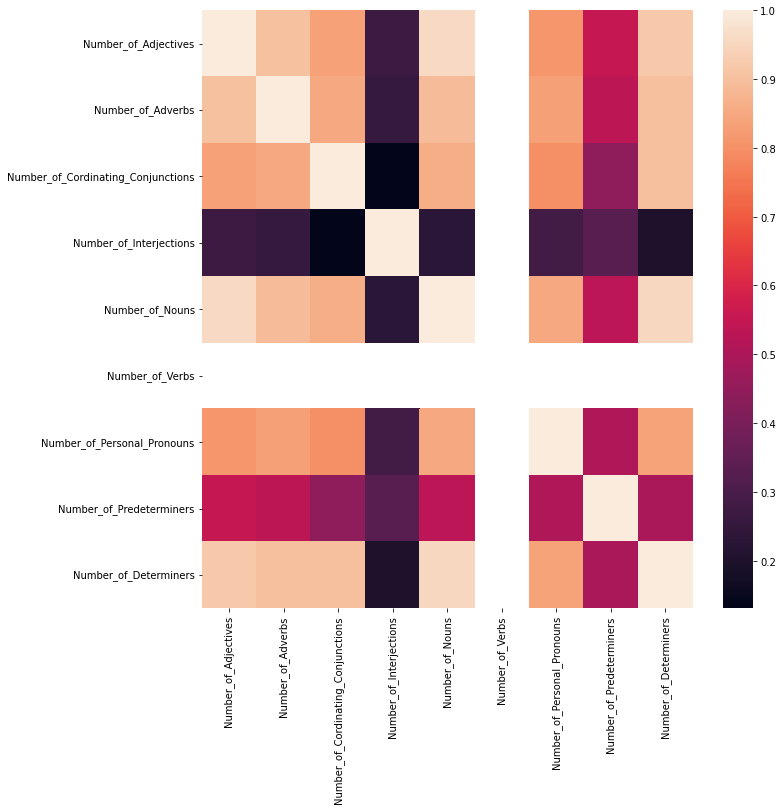

In [106]:
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(correlationMatrix)

# **Brute Force Method to Find Correlated Features**

In [107]:
columnsCorelation = set()
corr_mat = X_train.corr()
for i in range(len(corr_mat.columns)):
  for j in range(i):
    if (abs(corr_mat.iloc[i,j]) > 0.8):
      columnsCorelation.add(corr_mat.columns[i])

In [108]:
columnsCorelation

{'Number_of_Adverbs',
 'Number_of_Cordinating_Conjunctions',
 'Number_of_Determiners',
 'Number_of_Nouns',
 'Number_of_Personal_Pronouns'}

In [111]:
X_train.fillna(0, inplace=True)
Y_train.fillna(0, inplace=True)

In [112]:
X_train[features]

,Number_of_Determiners,Number_of_Nouns,Number_of_Adverbs,Number_of_Personal_Pronouns,Number_of_Cordinating_Conjunctions
1459,20,26,8,4,4
899,5,8,1,3,2
1220,8,9,5,4,5
1479,7,8,8,3,3
992,21,26,9,5,15
...,...,...,...,...,...
713,16,18,3,9,4
1199,13,18,12,10,7
99,38,68,29,14,18
744,7,8,6,4,1


In [113]:
from sklearn.ensemble import RandomForestClassifier

features = list(columnsCorelation)
randomForest = RandomForestClassifier(n_estimators=20, 
                                      random_state=101, 
                                      max_depth=4)
randomForest.fit(X_train[features], Y_train)

RandomForestClassifier(max_depth=4, n_estimators=20, random_state=101)

In [114]:
importance = pd.concat([pd.Series(features), 
                        pd.Series(randomForest.feature_importances_)],
                        axis=1)


In [115]:
importance.columns = ['feature', 'importance']
importance.sort_values(by='importance', ascending=False)

,feature,importance
1,Number_of_Nouns,0.246683
0,Number_of_Determiners,0.195984
2,Number_of_Adverbs,0.192061
4,Number_of_Cordinating_Conjunctions,0.189006
3,Number_of_Personal_Pronouns,0.176266
